## Deep Learning EEG

In [2]:
import numpy as np
from keras import models, layers

traindata = np.loadtxt('C:/Project/MachineLearning/Data/traineeg.csv', delimiter=',', dtype=np.float32)
train_images = traindata[:, 0:-1]
train_labels = traindata[:, [-1]]

testdata = np.loadtxt('C:/Project/MachineLearning/Data/testeeg.csv', delimiter=',', dtype=np.float32)
test_images = testdata[:, 0:-1]
test_labels = testdata[:, [-1]]

In [10]:
test_images.shape[1]

24

In [7]:
test_labels.shape[1]

1

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [26]:
# Define the input layer
inputs = Input(shape=(train_images.shape[1],))

# Define the model architecture
x = Dense(16, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) 

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_24 (Dense)            (None, 16)                400       
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 689 (2.69 KB)
Trainable params: 689 (2.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_history=model.fit(x=train_images, y=train_labels, epochs=10, batch_size=32, validation_split = 0.1, shuffle = True)
pred_DL = model.predict(test_images)

y_test_class = np.argmax(test_labels,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/10
29/29 [==============================] - 1s 10ms/step - loss: 1827.4872 - accuracy: 0.5556 - val_loss: 372.3600 - val_accuracy: 0.4800
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 232.2206 - accuracy: 0.5500 - val_loss: 178.7586 - val_accuracy: 0.5100
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 87.4100 - accuracy: 0.6300 - val_loss: 37.0943 - val_accuracy: 0.8100
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 21.3268 - accuracy: 0.8911 - val_loss: 97.1367 - val_accuracy: 0.6400
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 17.5232 - accuracy: 0.9011 - val_loss: 7.7259 - val_accuracy: 0.9600
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 4.9847 - accuracy: 0.9722 - val_loss: 4.5805 - val_accuracy: 0.9600
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 7.3526 - accuracy: 0.9722 - val_loss: 87.8765 - val_accuracy: 0.7300
Epoc

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 126192934912.0000 - accuracy: 0.9650


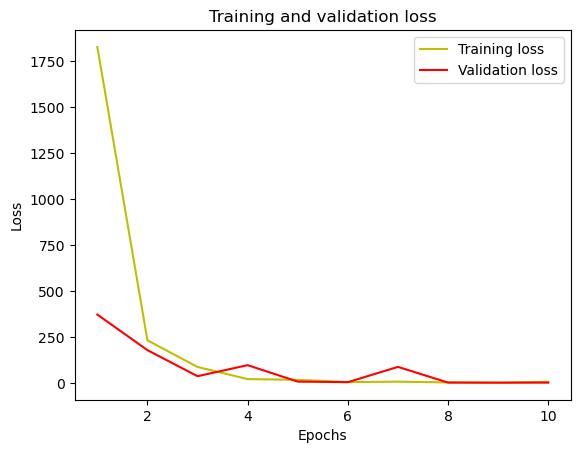

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

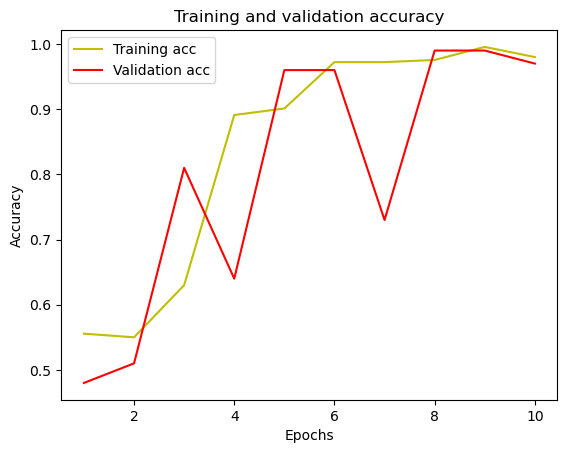

In [30]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

[[600]]
